## Bundling Jobs

In [28]:
from qiskit import *
import matplotlib.pyplot as plt
Q1 = QuantumCircuit(2,2)
Q2 = QuantumCircuit(2,2)
Q1.cx(0,1)
Q1.h(0)
Q1.measure([0,1],[0,1])

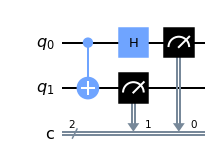

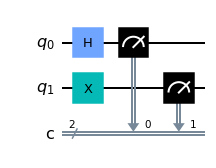

In [2]:
Q2.x(1)
Q2.h(0)
Q2.measure([0,1],[0,1])
display(Q1.draw(output='mpl'),Q2.draw(output='mpl'))


In [3]:
# bundling 
q_list = [Q1,Q2]


In [4]:
# execute the list of quantum circuits in this list 
# on the simulator
job = execute(q_list,backend=Aer.get_backend('qasm_simulator'),shots=1024)

In [5]:
job.result().get_counts()

[{'00': 547, '01': 477}, {'10': 507, '11': 517}]

- So you will basically get all the values in a dictionary corresponding to each of the jobs that you bundled in the list of the quantum circuits.
- That is it.

## Visualizing using Latex
- Example -> use latex to draw circuits in latex 
- use latex source to pack them in a latex string for exporting...

In [25]:
Q1.draw('latex_source')

'% \\documentclass[preview]{standalone}\n% If the image is too large to fit on this documentclass use\n\\documentclass[draft]{beamer}\n% img_width = 3, img_depth = 5\n\\usepackage[size=custom,height=10,width=13,scale=0.7]{beamerposter}\n% instead and customize the height and width (in cm) to fit.\n% Large images may run out of memory quickly.\n% To fix this use the LuaLaTeX compiler, which dynamically\n% allocates memory.\n\\usepackage[braket, qm]{qcircuit}\n\\usepackage{amsmath}\n\\pdfmapfile{+sansmathaccent.map}\n% \\usepackage[landscape]{geometry}\n% Comment out the above line if using the beamer documentclass.\n\\begin{document}\n\n\\begin{equation*}\n    \\Qcircuit @C=1.0em @R=0.0em @!R {\n\t \t\\lstick{ {q}_{0} :  } & \\ctrl{1} & \\gate{H} & \\meter & \\qw & \\qw\\\\\n\t \t\\lstick{ {q}_{1} :  } & \\targ & \\meter & \\qw & \\qw & \\qw\\\\\n\t \t\\lstick{c:} & {/_{_{2}}} \\cw & \\dstick{1} \\cw \\cwx[-1] & \\dstick{0} \\cw \\cwx[-2] & \\cw & \\cw\\\\\n\t }\n\\end{equation*}\n\n\\e

## Converting a circuit to Quantum Assembly Language
- How to convert circuits to QASM

In [27]:
# quite easy 
# circuit.qasm()
Q1.qasm(formatted=1)
# this is so much like normal assembly , wahh...


OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
cx q[0],q[1];
h q[0];
measure q[0] -> c[0];
measure q[1] -> c[1];



OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
cx q[0],q[1];
h q[0];
measure q[0] -> c[0];
measure q[1] -> c[1];



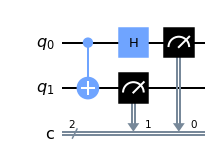

In [31]:
# can even save the file 
Q1.qasm(formatted=1, filename="trial_circuit.qasm")
Q1.draw(output='mpl')


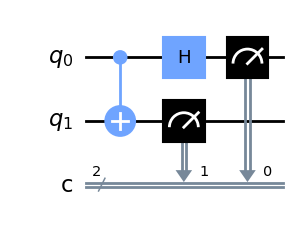

In [39]:
# can even make the circuits from file 
qc = QuantumCircuit.from_qasm_file('trial_circuit.qasm')
im = qc.draw(output='mpl',scale=1.4,)
im 

In [38]:
im.savefig("trial_circuit.png")

## That is niceeee!! :D